#Extrovert vs. Introvert Behavior Data

## Problem statement
"Given a flask app user entering in information about themselves to a questionnaire, how closely do those traits align with them being an introvert, extrovert, or somewhere in the middle between those?"

In [3]:
# Import dataset to start working with it
import pandas as pd

df = pd.read_csv("../data/raw/personality_dataset.csv", sep=",")

## Exploration and data cleaning

In [4]:
print(f"Raw data shape: {df.shape}")
print(df.info())

Raw data shape: (2900, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None


The dataset's big enough to play with, but not too big overall.
It mas missing values in various columns, some of them numeric features, others categorical.
Am going to skip dropping duplicates because it seems pretty plausible two people could submit comparable responses.

In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Split feature and target  
X = df.drop('Personality', axis=1)
y = df['Personality']

# Identify column types
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 
                    'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']


Because the dataset's small, am going to replace numerical missing values with the median of the column, and categorical missing values with the most common value in the column.

In [6]:

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Preview transformed data (fit_transform returns numpy array)
X_preprocessed = preprocessor.fit_transform(X)


## Analysis of univariate variables

### categorical variables

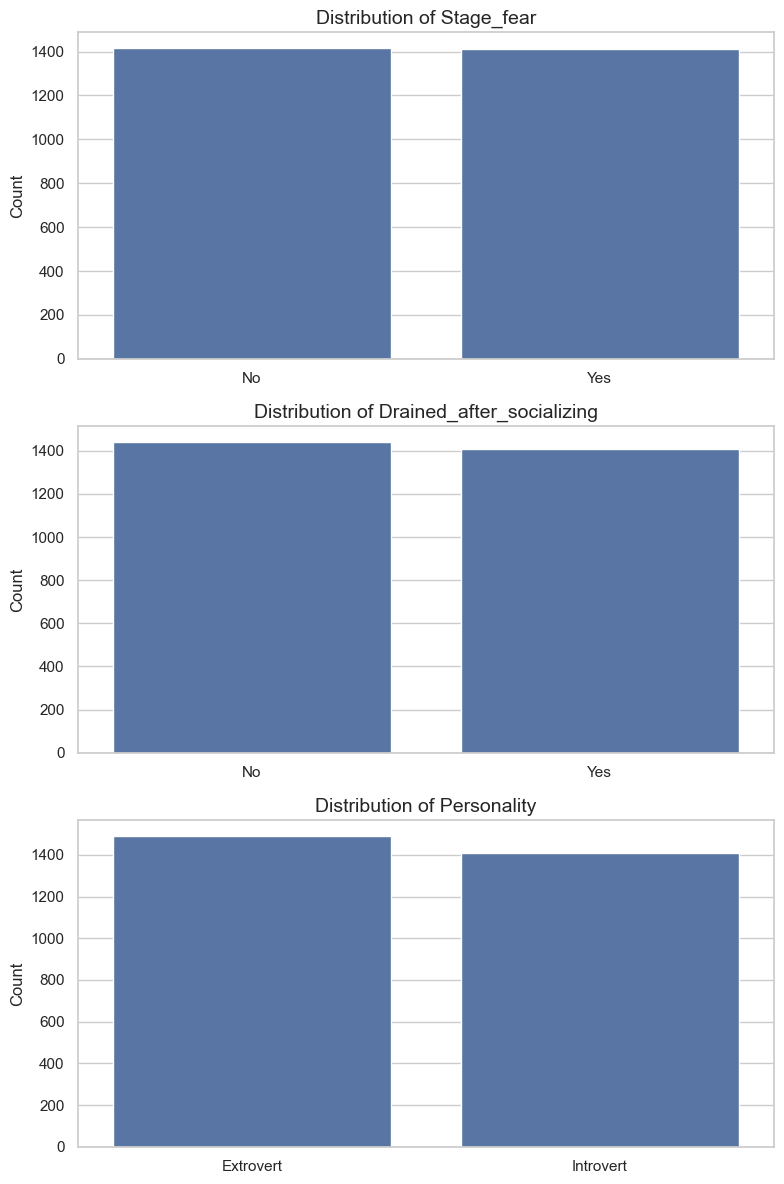

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# List of categorical columns to visualize
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Create separate subplots vertically to avoid layout issues
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(8, 12))

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=df, x=col, ax=ax, )
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


### numeric variables

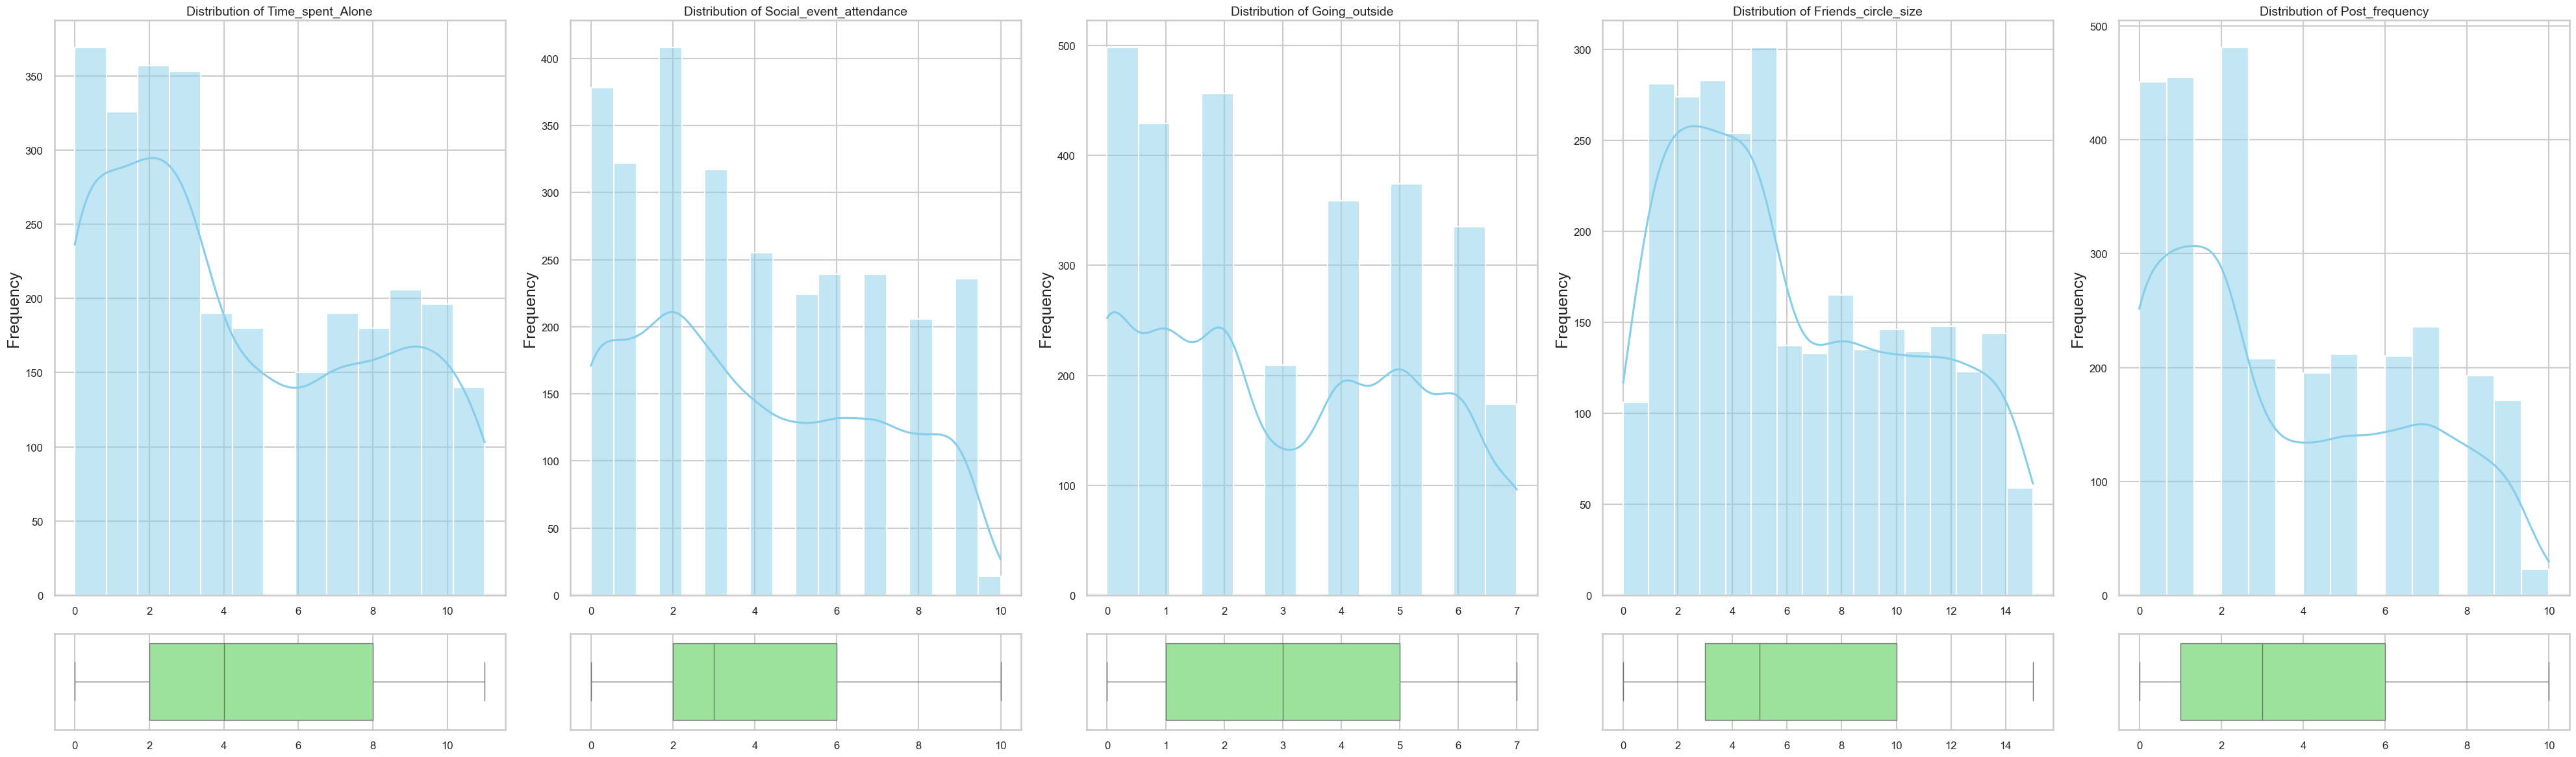

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and scale all font elements
sns.set(style='whitegrid')
sns.set_context('talk')  # Boosts label and tick size for readability

numeric_variables = ['Time_spent_Alone', 'Social_event_attendance',
                     'Going_outside', 'Friends_circle_size', 'Post_frequency']

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(numeric_variables),
    figsize=(8 * len(numeric_variables), 12),
    gridspec_kw={"height_ratios": [6, 1]}
)

for idx, col in enumerate(numeric_variables):
    sns.histplot(data=df, x=col, ax=axes[0, idx], kde=True, color='skyblue')
    axes[0, idx].set_title(f'Distribution of {col}', fontsize=14)
    axes[0, idx].set_xlabel('')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].tick_params(labelsize=12)

    sns.boxplot(data=df, x=col, ax=axes[1, idx], color='lightgreen')
    axes[1, idx].set_xlabel('')
    axes[1, idx].set_ylabel('')
    axes[1, idx].tick_params(labelsize=12)

plt.tight_layout()
plt.show()


## Analysis of multivariate variables

## Numerical-numerical analysis


### categorical-categorical analysis


#### TODO: deterine whether data needs this section


### Correlation analysis


#### skipped; covered by heatmap in a cell not much further below


#### numerical-categorical analysis


## Building decision tree mcdel


### Splitting training vs test data


### Scaling


### feature selection for selecting most-relevant features to use for building ML model


### Accuracy score without hyperparameter optimization


## Tuning


### Hyperparameter optimizing

#### Grid search


#### Random search hyperparameter optimization-hunting


## Saving the model